In [38]:
import pandas as pd
import numpy as np
import emoji
import nltk

In [39]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## emoji related functions

In [40]:
def emojiname2icon(name):
    return emoji.emojize(f":{name.replace(' ','_')}:")

emojiname2icon('smiling face with hearts')

'🥰'

## Combine data from different data sources

In [41]:
#Produce Emoji_DF[emoji_id, emoji_name]
top_20_emoji_name = [
    'face with tears of joy', # funny happy
    
    'red heart', #love
    
    'broken heart', #no love
    
    'thumbs up', #encouragement
    
    'smiling face with smiling eyes', #happy
    
    'loudly crying face', #pure sad
    
    'clapping hands', #congradualation
    
    'fire', #hot /sexy
    
    'face screaming in fear', #shock
    
    'pile of poo', #non-sense, disapproval
    
    'face with symbols on mouth', #anger
    
    'eggplant', #horny
    
    'face savoring food', # craving
    
    'hundred points', #approval
    
    'folded hands', #pray
    
    
]

emoji_reference = {'emoji_name':top_20_emoji_name,'emoji_id':[i for i in range(len(top_20_emoji_name))]}
emoji_df =  pd.DataFrame(emoji_reference)
emoji_df


,emoji_name,emoji_id
0,face with tears of joy,0
1,red heart,1
2,broken heart,2
3,thumbs up,3
4,smiling face with smiling eyes,4
5,loudly crying face,5
6,clapping hands,6
7,fire,7
8,face screaming in fear,8
9,pile of poo,9


# Read in Data

In [42]:
train_df = pd.read_csv('train 15 emoji.csv')
test_df = pd.read_csv('test 15 emoji.csv')



# Data

In [43]:
train_df

,emoji_id,content,cleaned_content,cleaned_content_len
0,7,announcement on Sunday 6pm ! 🔥\n,announcement sunday pm,3
1,6,Chelsea legend Frank Lampard will receive the ...,chelsea legend frank lampard receive football ...,12
2,8,HE JUST DESTROYED THIS MAN 😱\n,destroy man,2
3,10,It’s twitter I’m sure 🤬\n,twitter im sure,3
4,5,Yeah and I think u need a phone no too😭\n,yeah think u need phone,5
...,...,...,...,...
156724,6,Dirty Heads - Celebrate feat. The Unlikely Can...,dirty head celebrate feat unlikely candidate o...,12
156725,4,ETHAN AND GRAYSON WERE NOMINATED FOR A SHORTY ...,ethan grayson nominate shorty award make sure ...,13
156726,1,[EXO-CBX ALBUM GIVEAWAY] Hi! will be hosting h...,exocbx album giveaway hi host first please giv...,11
156727,13,TEN who? He’s “HUNDRED” now!! 😂💯🙌🏼\n,ten he hundred,3


In [44]:
test_df

,emoji_id,content,cleaned_content,cleaned_content_len
0,4,might be reuniting with la famiglia next month...,might reunite la famiglia next month che bello,8
1,12,getting that booty ate 🍑😋\n,get booty ate,3
2,1,Which baddies wnat to be posted?😋❤️\n,baddie wnat post,3
3,3,Yeah our King is avid reader and so wise and H...,yeah king avid reader wise son mohammed learns...,9
4,7,The HOTTEST Air Jordans Of All Time😍🔥🔥🔥💦💦👌🏻\n,hot air jordan time,4
...,...,...,...,...
67126,1,Veggie Facts! We RULE! ❤️❤️❤️\n,veggie fact rule,3
67127,2,BLESSING 💋💘❤️💓💔💕💖💗💙💚💛💜🖤💝💞💟❣️💟💞💝🖤💜💛💚💙💗💖💕💔💓❤️💘💋💘...,blessing,1
67128,5,Ugh this hurts me 😭😭😭\n,ugh hurt,2
67129,0,"Perfect example of, ""Tit for tat"": 😂\n",perfect example tit tat,4


In [45]:
emoji_df

,emoji_name,emoji_id
0,face with tears of joy,0
1,red heart,1
2,broken heart,2
3,thumbs up,3
4,smiling face with smiling eyes,4
5,loudly crying face,5
6,clapping hands,6
7,fire,7
8,face screaming in fear,8
9,pile of poo,9


# CNN

In [46]:
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D
import numpy as np
from keras.utils import pad_sequences
from gensim.models import KeyedVectors
import math
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# CNN
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import concatenate
from keras.models import Model

In [47]:
# Read in data and shuffle emoji library
random.seed(4222)
emoji_shuffled = shuffle(emoji_df)
print(emoji_shuffled)

                        emoji_name  emoji_id
7                             fire         7
11                        eggplant        11
0           face with tears of joy         0
12              face savoring food        12
5               loudly crying face         5
4   smiling face with smiling eyes         4
2                     broken heart         2
3                        thumbs up         3
13                  hundred points        13
6                   clapping hands         6
8           face screaming in fear         8
1                        red heart         1
9                      pile of poo         9
10      face with symbols on mouth        10
14                    folded hands        14


In [48]:
# Record the separting index of train vs test split
split_index = len(train_df)

In [49]:
all_df = pd.concat([train_df, test_df])
tweets_content = all_df["cleaned_content"]
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', split=" ", lower=True)
tokenizer.fit_on_texts(tweets_content)
all_df["encoded_content"] = tokenizer.texts_to_sequences(tweets_content)
print(all_df["encoded_content"][:10])

0                                     [2188, 427, 288]
1    [1324, 490, 3288, 11236, 648, 715, 384, 3522, ...
2                                            [788, 44]
3                                        [146, 3, 167]
4                                [308, 42, 8, 25, 350]
5          [1409, 146, 295, 383, 321, 12471, 26, 2346]
6      [3, 29218, 14, 61, 1844, 214, 11237, 700, 7822]
7                                             [4, 545]
8    [230, 85, 2, 732, 11238, 9492, 6176, 28, 29, 8...
9                                            [4, 2272]
Name: encoded_content, dtype: object


In [50]:
train_df = all_df.iloc[:split_index]
test_df = all_df.iloc[split_index:]

In [51]:
train_df

,emoji_id,content,cleaned_content,cleaned_content_len,encoded_content
0,7,announcement on Sunday 6pm ! 🔥\n,announcement sunday pm,3,"[2188, 427, 288]"
1,6,Chelsea legend Frank Lampard will receive the ...,chelsea legend frank lampard receive football ...,12,"[1324, 490, 3288, 11236, 648, 715, 384, 3522, ..."
2,8,HE JUST DESTROYED THIS MAN 😱\n,destroy man,2,"[788, 44]"
3,10,It’s twitter I’m sure 🤬\n,twitter im sure,3,"[146, 3, 167]"
4,5,Yeah and I think u need a phone no too😭\n,yeah think u need phone,5,"[308, 42, 8, 25, 350]"
...,...,...,...,...,...
156724,6,Dirty Heads - Celebrate feat. The Unlikely Can...,dirty head celebrate feat unlikely candidate o...,12,"[756, 265, 658, 1765, 14102, 3215, 374, 40, 86..."
156725,4,ETHAN AND GRAYSON WERE NOMINATED FOR A SHORTY ...,ethan grayson nominate shorty award make sure ...,13,"[5666, 5235, 1768, 1299, 384, 11, 167, 6, 309,..."
156726,1,[EXO-CBX ALBUM GIVEAWAY] Hi! will be hosting h...,exocbx album giveaway hi host first please giv...,11,"[1937, 235, 275, 338, 2054, 75, 28, 52, 4, 151..."
156727,13,TEN who? He’s “HUNDRED” now!! 😂💯🙌🏼\n,ten he hundred,3,"[1548, 159, 2660]"


In [52]:
test_df

,emoji_id,content,cleaned_content,cleaned_content_len,encoded_content
0,4,might be reuniting with la famiglia next month...,might reunite la famiglia next month che bello,8,"[438, 4182, 631, 59426, 122, 228, 5115, 23000]"
1,12,getting that booty ate 🍑😋\n,get booty ate,3,"[1, 875, 911]"
2,1,Which baddies wnat to be posted?😋❤️\n,baddie wnat post,3,"[2760, 5036, 177]"
3,3,Yeah our King is avid reader and so wise and H...,yeah king avid reader wise son mohammed learns...,9,"[308, 387, 26206, 6382, 3214, 463, 9164, 18666..."
4,7,The HOTTEST Air Jordans Of All Time😍🔥🔥🔥💦💦👌🏻\n,hot air jordan time,4,"[173, 783, 2042, 18]"
...,...,...,...,...,...
67126,1,Veggie Facts! We RULE! ❤️❤️❤️\n,veggie fact rule,3,"[3536, 388, 1010]"
67127,2,BLESSING 💋💘❤️💓💔💕💖💗💙💚💛💜🖤💝💞💟❣️💟💞💝🖤💜💛💚💙💗💖💕💔💓❤️💘💋💘...,blessing,1,[611]
67128,5,Ugh this hurts me 😭😭😭\n,ugh hurt,2,"[1360, 299]"
67129,0,"Perfect example of, ""Tit for tat"": 😂\n",perfect example tit tat,4,"[340, 1974, 1659, 2757]"


max_length = 34


<Axes: ylabel='count'>

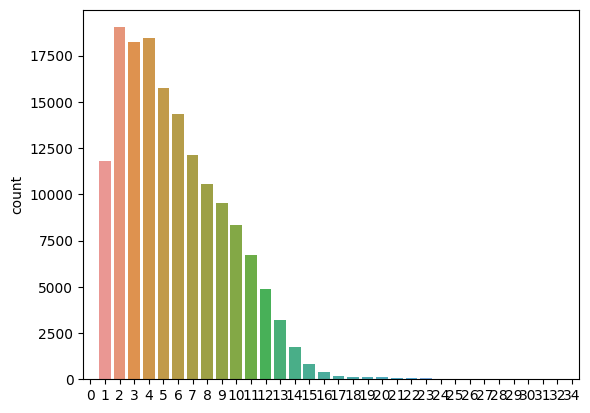

In [53]:
# Define max_length
import seaborn as sns
lengths = [len(seq) for seq in train_df["encoded_content"]]
max_length = max(lengths)
print("max_length =", max_length)
sns.countplot(x = lengths)

In [54]:
# Apply padding to data set and convert labels to bit vector form
train_X = pad_sequences(train_df["encoded_content"], padding='post', maxlen = max_length)
train_Y = train_df["emoji_id"]
train_X

array([[2188,  427,  288, ...,    0,    0,    0],
       [1324,  490, 3288, ...,    0,    0,    0],
       [ 788,   44,    0, ...,    0,    0,    0],
       ...,
       [1937,  235,  275, ...,    0,    0,    0],
       [1548,  159, 2660, ...,    0,    0,    0],
       [ 252,  202, 1125, ...,    0,    0,    0]], dtype=int32)

In [55]:
total_emoji_number = len(emoji_df)

In [56]:
# Padding for test data
# Apply padding to data set and convert labels to bit vector form
test_X = pad_sequences(test_df["encoded_content"], padding='post', maxlen = max_length)
test_Y = test_df["emoji_id"]

In [57]:
print(train_X.shape)
print(len(train_Y))
print(test_X.shape)
print(len(test_Y))

(156729, 34)
156729
(67131, 34)
67131


In [58]:
# View the vocab library
vocab = tokenizer.word_index
vocab

{'get': 1,
 'like': 2,
 'im': 3,
 'love': 4,
 'amp': 5,
 'go': 6,
 'good': 7,
 'u': 8,
 'day': 9,
 'dont': 10,
 'make': 11,
 'follow': 12,
 'one': 13,
 'see': 14,
 'thank': 15,
 'retweet': 16,
 'back': 17,
 'time': 18,
 'new': 19,
 'happy': 20,
 'want': 21,
 'know': 22,
 'rt': 23,
 'look': 24,
 'need': 25,
 'say': 26,
 'come': 27,
 'please': 28,
 'let': 29,
 'cant': 30,
 'today': 31,
 'take': 32,
 'best': 33,
 'much': 34,
 'well': 35,
 'fuck': 36,
 'year': 37,
 'shit': 38,
 'everyone': 39,
 'video': 40,
 'people': 41,
 'think': 42,
 'really': 43,
 'man': 44,
 'god': 45,
 'watch': 46,
 'great': 47,
 'na': 48,
 'tweet': 49,
 'never': 50,
 'guy': 51,
 'give': 52,
 'still': 53,
 'life': 54,
 'keep': 55,
 'yall': 56,
 'girl': 57,
 'right': 58,
 'big': 59,
 'work': 60,
 'always': 61,
 'miss': 62,
 'thanks': 63,
 'thing': 64,
 'thats': 65,
 'feel': 66,
 'even': 67,
 'youre': 68,
 'friend': 69,
 'help': 70,
 'last': 71,
 'ever': 72,
 'wait': 73,
 'luck': 74,
 'first': 75,
 'http': 76,
 'heart'

In [59]:
len(vocab)

72636

In [60]:
vocabulary_size = len(vocab)
seq_len = max_length
embed_len = 128

# CNN Baseline
model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length = seq_len))
model.add(Conv1D(256, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(total_emoji_number, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 34, 128)           9297536   
                                                                 
 conv1d_1 (Conv1D)           (None, 34, 256)           98560     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 17, 256)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4352)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                278592    
                                                                 
 dense_3 (Dense)             (None, 15)                975       
                                                      

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)
model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [62]:
from keras.utils import to_categorical

train_Y_cat = to_categorical(train_Y)
test_Y_cat = to_categorical(test_Y)
print(train_Y_cat.shape)
print(test_Y_cat.shape)

(156729, 15)
(67131, 15)


In [63]:
batch_size=64
epochs = 10

model.fit(train_X, train_Y_cat, batch_size=batch_size, epochs = epochs, 
          shuffle=True,validation_data=(test_X, test_Y_cat), callbacks=[early_stop]) #, callbacks=[early_stop]

Epoch 1/10
2449/2449 [==============================] - 353s 144ms/step - loss: 2.1332 - accuracy: 0.3241 - val_loss: 1.9445 - val_accuracy: 0.3926
Epoch 2/10
2449/2449 [==============================] - 350s 143ms/step - loss: 1.5984 - accuracy: 0.5066 - val_loss: 1.9650 - val_accuracy: 0.4085
Epoch 2: early stopping


In [64]:
model.evaluate(test_X, test_Y_cat, batch_size=batch_size)

1049/1049 [==============================] - 8s 8ms/step - loss: 1.9650 - accuracy: 0.4085


[1.9649559259414673, 0.40854448080062866]

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

predictions_prob = model.predict(test_X)
print(predictions_prob)
print(len(predictions_prob))
print(len(predictions_prob[0]))

2098/2098 [==============================] - 12s 6ms/step
[[1.76240280e-02 1.50778934e-01 4.30720262e-02 ... 2.87554134e-02
  3.32438834e-02 2.27277800e-01]
 [1.00792469e-02 2.49871500e-02 3.47764674e-03 ... 5.89728832e-01
  7.29606766e-03 2.19600857e-03]
 [9.82070901e-07 1.07755346e-04 3.48581671e-06 ... 9.99821246e-01
  2.72871489e-07 1.21249855e-07]
 ...
 [1.27169704e-02 3.21998298e-02 7.33487368e-01 ... 7.94305652e-03
  2.95176660e-03 3.97847686e-03]
 [2.04011775e-03 2.76804529e-03 1.42708290e-04 ... 1.70020118e-01
  1.22164085e-03 1.82313917e-04]
 [5.07178083e-06 4.18495727e-09 5.10053212e-07 ... 7.54967289e-07
  3.59503389e-07 1.75076735e-08]]
67131
15


In [66]:
# model.save("BLSTM.2")

In [67]:
# Get the predicted emoji class
test_Y_pred = np.argmax(model.predict(test_X), axis=-1)

2098/2098 [==============================] - 11s 5ms/step


# Model Evaluation

In [68]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, test_Y_pred))

              precision    recall  f1-score   support

           0       0.28      0.28      0.28      4462
           1       0.31      0.32      0.31      4386
           2       0.39      0.55      0.46      4466
           3       0.30      0.31      0.31      4501
           4       0.30      0.34      0.32      4513
           5       0.42      0.22      0.29      4514
           6       0.39      0.40      0.40      4504
           7       0.46      0.37      0.41      4458
           8       0.39      0.53      0.45      4370
           9       0.55      0.50      0.53      4426
          10       0.46      0.47      0.46      4468
          11       0.54      0.64      0.59      4508
          12       0.46      0.42      0.44      4532
          13       0.41      0.38      0.39      4452
          14       0.54      0.39      0.46      4571

    accuracy                           0.41     67131
   macro avg       0.41      0.41      0.41     67131
weighted avg       0.41   

# Emoji Recommender Top k Evaluation

In [69]:
def top_k_prediction(prob, k):
    results = []
    for item in prob:
        # Create a copy of the original array to avoid modifying it
        arr_copy = item.copy()

        # Get the indices that would sort the array in ascending order
        sorted_indices = np.argsort(arr_copy)

        # Take the last 5 indices to get the indices of the top 5 elements
        top_indices = sorted_indices[-k:]
        
        results.append(top_indices)
        
    return results

In [70]:
result = test_df.copy()
top_3_predictions = top_k_prediction(predictions_prob, 3)
result["predict_emoji_3"] = top_3_predictions
result["predict_accurate_3"] = result.apply(lambda x: x.emoji_id in x.predict_emoji_3, axis = 1)

In [71]:
# Top 3 accuracy - overall score
print(len(result[result["predict_accurate_3"] == 1]) / len(result))

0.627608705367118


In [72]:
result["count"] = 1
result_top_3_aggregated = pd.DataFrame()
result_top_3_aggregated["emoji_id"] = result.groupby("emoji_id")['predict_accurate_3'].sum().index.astype('str')
result_top_3_aggregated["count"] = result.groupby("emoji_id")['count'].sum().values
result_top_3_aggregated["accurate predictions"] = result.groupby("emoji_id")['predict_accurate_3'].sum().values
result_top_3_aggregated = result_top_3_aggregated.sort_values('accurate predictions', ascending = False)
result_top_3_aggregated["accuracy"] = result_top_3_aggregated["accurate predictions"] / result_top_3_aggregated["count"]
result_top_3_aggregated["emoji_id"] = pd.to_numeric(result_top_3_aggregated["emoji_id"])
result_top_3_aggregated = result_top_3_aggregated.sort_values(by=['emoji_id'])
result_top_3_aggregated

,emoji_id,count,accurate predictions,accuracy
0,0,4462,2616,0.586284
1,1,4386,2679,0.610807
2,2,4466,3122,0.699060
3,3,4501,2681,0.595645
4,4,4513,2815,0.623754
5,5,4514,2414,0.534781
6,6,4504,2748,0.610124
7,7,4458,2729,0.612158
8,8,4370,2939,0.672540
9,9,4426,2916,0.658834


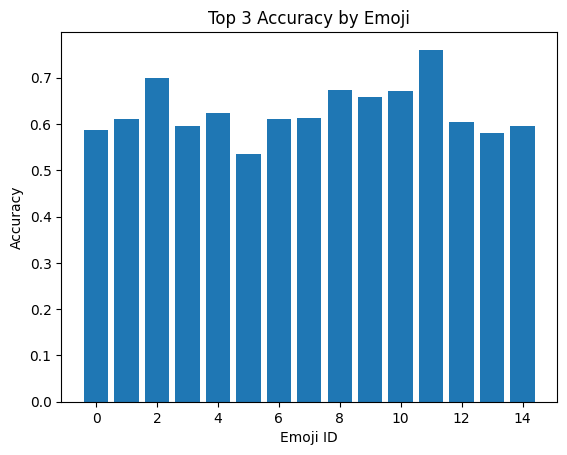

In [73]:
import matplotlib.pyplot as plt

x = result_top_3_aggregated["emoji_id"]
y = result_top_3_aggregated["accuracy"]

# Create the bar chart using the bar function
plt.bar(x, y)

# Add a title and axis labels
plt.title('Top 3 Accuracy by Emoji')
plt.xlabel('Emoji ID')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

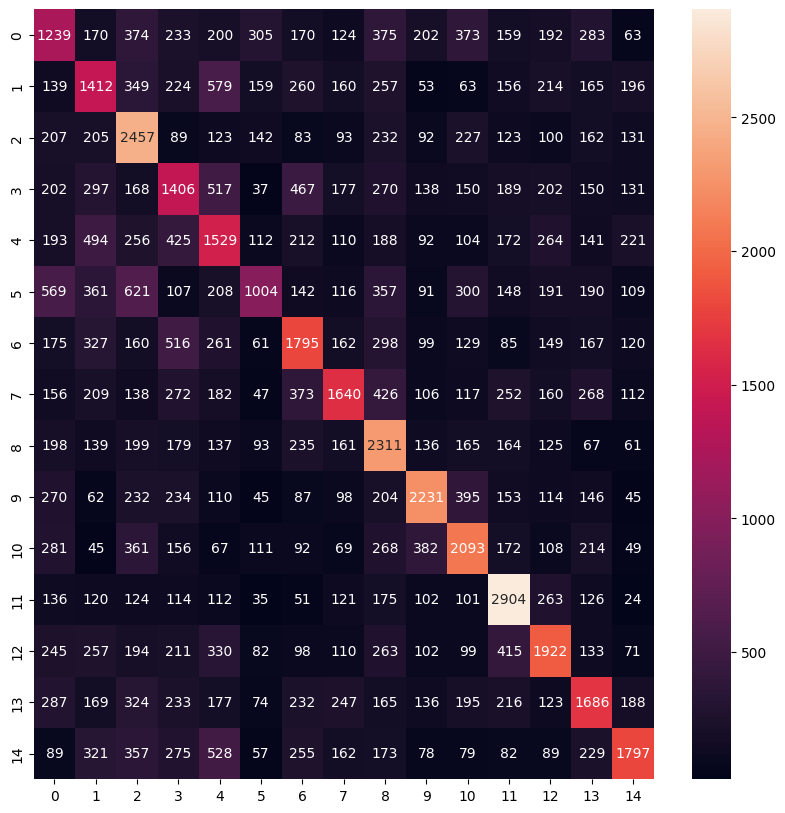

In [74]:
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(test_Y, test_Y_pred))
import seaborn as sn
plt.figure(figsize = (10, 10))
sn.heatmap(df_cm, annot = True, fmt = 'd')
plt.show()